# <B>MOD 4 PROJECT

<b>main factors in life satisfaction:</b>
   <br>health status
   <br>mental health
   <br>income
   <br>employment status

# <b>DATA CLEANING

<B>IMPORTING DATA:

In [95]:
#importing necessary packages
import numpy as np
from scipy import stats 
import math
import statsmodels.api as sm 
import pylab as py
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

<B>LOOKING THROUGH THE DATASET:

In [96]:
#importing pandas and the csv files
import pandas as pd
df = pd.read_csv('analytic_data2019.csv')
df.head()

C:\Users\jesus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

State FIPS Code County FIPS Code 5-digit FIPS Code State Abbreviation  \
0       statecode       countycode          fipscode              state   
1              00              000             00000                 US   
2              01              000             01000                 AL   
3              01              001             01001                 AL   
4              01              003             01003                 AL   

             Name Release Year County Ranked (Yes=1/No=0)  \
0          county         year              county_ranked   
1   United States         2019                        NaN   
2         Alabama         2019                        NaN   
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   

  Premature death raw value Premature death numerator  \
0             v001_rawvalue            v001_numerator   
1               6900.630354                   3745538   
2              9917.2328984                     80440   
3              8824.0571232                       815   
4              7224.6321603                      2827   

  Premature death denominator  ... Male population 18-44 raw value  \
0            v001_denominator  ...                   v013_rawvalue   
1                   908266078  ...                             NaN   
2                    13636816  ...                             NaN   
3                      156132  ...                             NaN   
4                      576496  ...                             NaN   

  Male population 45-64 raw value Male population 65+ raw value  \
0                   v016_rawvalue                 v017_rawvalue   
1                             NaN                           NaN   
2                             NaN                           NaN   
3                             NaN                           NaN   
4                             NaN                           NaN   

  Total male population raw value Female population 0-17 raw value  \
0                   v025_rawvalue                    v026_rawvalue   
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   

  Female population 18-44 raw value Female population 45-64 raw value  \
0                     v027_rawvalue                     v031_rawvalue   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4                               NaN                               NaN   

  Female population 65+ raw value Total female population raw value  \
0                   v032_rawvalue                     v035_rawvalue   
1                             NaN                               NaN   
2                             NaN                               NaN   
3                             NaN                               NaN   
4                             NaN                               NaN   

  Population growth raw value  
0               v097_rawvalue  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  

[5 rows x 534 columns]

In [97]:
#checking shape
df.shape

(3195, 534)

In [98]:
#display list of column values
list(df.columns.values)

['State FIPS Code',
 'County FIPS Code',
 '5-digit FIPS Code',
 'State Abbreviation',
 'Name',
 'Release Year',
 'County Ranked (Yes=1/No=0)',
 'Premature death raw value',
 'Premature death numerator',
 'Premature death denominator',
 'Premature death CI low',
 'Premature death CI high',
 'Premature death (Black)',
 'Premature death (Hispanic)',
 'Premature death (White)',
 'Poor or fair health raw value',
 'Poor or fair health numerator',
 'Poor or fair health denominator',
 'Poor or fair health CI low',
 'Poor or fair health CI high',
 'Poor physical health days raw value',
 'Poor physical health days numerator',
 'Poor physical health days denominator',
 'Poor physical health days CI low',
 'Poor physical health days CI high',
 'Poor mental health days raw value',
 'Poor mental health days numerator',
 'Poor mental health days denominator',
 'Poor mental health days CI low',
 'Poor mental health days CI high',
 'Low birthweight raw value',
 'Low birthweight numerator',
 'Low birthw

In [99]:
#checking for nan values
df.isna().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [100]:
#checking for null values
df.isnull().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [101]:
#renaming columns by placing an underscore between words to make it more usable
columns_name = df.columns
new_column_names = []
for column_name in columns_name:
    new_column_names.append(column_name.replace(" ", "_"))
print(new_column_names[:10])
df.columns = new_column_names

['State_FIPS_Code', 'County_FIPS_Code', '5-digit_FIPS_Code', 'State_Abbreviation', 'Name', 'Release_Year', 'County_Ranked_(Yes=1/No=0)', 'Premature_death_raw_value', 'Premature_death_numerator', 'Premature_death_denominator']


In [102]:
df = df.iloc[2:]

In [103]:
df = df.loc[((df['County_FIPS_Code']!='000') & (df['County_FIPS_Code']!=0))]

In [104]:
df.head()

State_FIPS_Code County_FIPS_Code 5-digit_FIPS_Code State_Abbreviation  \
3              01              001             01001                 AL   
4              01              003             01003                 AL   
5              01              005             01005                 AL   
6              01              007             01007                 AL   
7              01              009             01009                 AL   

             Name Release_Year County_Ranked_(Yes=1/No=0)  \
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   
5  Barbour County         2019                          1   
6     Bibb County         2019                          1   
7   Blount County         2019                          1   

  Premature_death_raw_value Premature_death_numerator  \
3              8824.0571232                       815   
4              7224.6321603                      2827   
5               9586.165037                       451   
6              11783.543675                       445   
7              10908.101822                      1050   

  Premature_death_denominator  ... Male_population_18-44_raw_value  \
3                      156132  ...                             NaN   
4                      576496  ...                             NaN   
5                       72222  ...                             NaN   
6                       63653  ...                             NaN   
7                      161107  ...                             NaN   

  Male_population_45-64_raw_value Male_population_65+_raw_value  \
3                             NaN                           NaN   
4                             NaN                           NaN   
5                             NaN                           NaN   
6                             NaN                           NaN   
7                             NaN                           NaN   

  Total_male_population_raw_value Female_population_0-17_raw_value  \
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   
6                             NaN                              NaN   
7                             NaN                              NaN   

  Female_population_18-44_raw_value Female_population_45-64_raw_value  \
3                               NaN                               NaN   
4                               NaN                               NaN   
5                               NaN                               NaN   
6                               NaN                               NaN   
7                               NaN                               NaN   

  Female_population_65+_raw_value Total_female_population_raw_value  \
3                             NaN                               NaN   
4                             NaN                               NaN   
5                             NaN                               NaN   
6                             NaN                               NaN   
7                             NaN                               NaN   

  Population_growth_raw_value  
3                         NaN  
4                         NaN  
5                         NaN  
6                         NaN  
7                         NaN  

[5 rows x 534 columns]

In [105]:
xls = pd.ExcelFile("2019 County Health Rankings Data - v2.xls")
health_rankings = xls.parse(index_col=None, na_values=['NA'])
df.to_csv('file.csv')
health_rankings.head()

Unnamed: 0 Unnamed: 1 Unnamed: 2
0  A collaboration between the Robert Wood Johnso...        NaN        NaN
1                                                NaN        NaN        NaN
2  This Excel file contains the rankings and data...        NaN        NaN
3  1) Outcomes and Factors Rankings--Ranks are al...        NaN        NaN
4  2) Outcomes and Factors SubRankings--Ranks are...        NaN        NaN

In [106]:
xls = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')
sheet0 = xls.parse(0,skiprows=1) 
sheet1 = xls.parse(1,skiprows=1) 
sheet2 = xls.parse(2,skiprows=1) 
sheet3 = xls.parse(3,skiprows=1) 
sheet4 = xls.parse(4,skiprows=1) 
sheet5 = xls.parse(5,skiprows=1) 
sheet6 = xls.parse(6,skiprows=1)

In [107]:
sheet4

Focus Area  \
0                    Length of life (50%)   
1                   Quality of life (50%)   
2                                     NaN   
3                                     NaN   
4                                     NaN   
5                                     NaN   
6                  Health Behaviors (30%)   
7                             Focus Area    
8                       Tobacco use (10%)   
9                 Diet and exercise (10%)   
10                                    NaN   
11                                    NaN   
12                                    NaN   
13              Alcohol and drug use (5%)   
14                                    NaN   
15                   Sexual activity (5%)   
16                                    NaN   
17                                    NaN   
18                    Clinical Care (20%)   
19                            Focus Area    
20                   Access to care (10%)   
21                                    NaN   
22                                    NaN   
23                                    NaN   
24                  Quality of care (10%)   
25                                    NaN   
26                                    NaN   
27                                    NaN   
28  Social and Economic Environment (40%)   
29                             Focus Area   
30                        Education (10%)   
31                                    NaN   
32                       Employment (10%)   
33                           Income (10%)   
34                                    NaN   
35         Family and social support (5%)   
36                                    NaN   
37                  Community safety (5%)   
38                                    NaN   
39                                    NaN   
40                                    NaN   
41                            Focus Area    
42             Air and water quality (5%)   
43                                    NaN   
44               Housing and transit (5%)   
45                                    NaN   
46                                    NaN   
47                                    NaN   
48                                    NaN   

                                 Measure  \
0                        Premature death   
1                    Poor or fair health   
2              Poor physical health days   
3                Poor mental health days   
4                        Low birthweight   
5                                    NaN   
6                                    NaN   
7                                Measure   
8                          Adult smoking   
9                          Adult obesity   
10                Food environment index   
11                   Physical inactivity   
12      Access to exercise opportunities   
13                    Excessive drinking   
14       Alcohol-impaired driving deaths   
15       Sexually transmitted infections   
16                           Teen births   
17                                   NaN   
18                                   NaN   
19                               Measure   
20                            Uninsured    
21               Primary care physicians   
22                              Dentists   
23               Mental health providers   
24            Preventable hospital stays   
25                 Mammography screening   
26                      Flu vaccinations   
27                                   NaN   
28                                   NaN   
29                               Measure   
30                High school graduation   
31                          Some college   
32                          Unemployment   
33                   Children in poverty   
34                     Income inequality   
35  Children in single-parent households   
36                   Social associations   
37                         Violent crime   
38                         Injury deaths   
39                  

In [108]:
sheet3.set_index('FIPS', inplace=True)
sheet5.set_index('FIPS', inplace=True)

In [109]:
#combined = pd.concat([df, sheet5, sheet3], axis=1, sort=False, join='inner')

combined = pd.concat([df], axis=1, sort=False, join='inner')
combined.shape

(3142, 534)

In [110]:
df = combined.copy()

In [111]:
clean_columns = [x for x in df.columns if
                 ("numerator" not in x) and
                 ("denominator" not in x) and
                 ("CI_low" not in x) and
                 ("CI_high" not in x)]

In [112]:
df = combined[clean_columns]
df.head()

State_FIPS_Code County_FIPS_Code 5-digit_FIPS_Code State_Abbreviation  \
3              01              001             01001                 AL   
4              01              003             01003                 AL   
5              01              005             01005                 AL   
6              01              007             01007                 AL   
7              01              009             01009                 AL   

             Name Release_Year County_Ranked_(Yes=1/No=0)  \
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   
5  Barbour County         2019                          1   
6     Bibb County         2019                          1   
7   Blount County         2019                          1   

  Premature_death_raw_value Premature_death_(Black)  \
3              8824.0571232            10471.252986   
4              7224.6321603            10042.472874   
5               9586.165037            11332.562909   
6              11783.543675             14812.53928   
7              10908.101822                     NaN   

  Premature_death_(Hispanic)  ... Male_population_18-44_raw_value  \
3                        NaN  ...                             NaN   
4               3086.6056945  ...                             NaN   
5                        NaN  ...                             NaN   
6                        NaN  ...                             NaN   
7               5619.6451858  ...                             NaN   

  Male_population_45-64_raw_value Male_population_65+_raw_value  \
3                             NaN                           NaN   
4                             NaN                           NaN   
5                             NaN                           NaN   
6                             NaN                           NaN   
7                             NaN                           NaN   

  Total_male_population_raw_value Female_population_0-17_raw_value  \
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   
6                             NaN                              NaN   
7                             NaN                              NaN   

  Female_population_18-44_raw_value Female_population_45-64_raw_value  \
3                               NaN                               NaN   
4                               NaN                               NaN   
5                               NaN                               NaN   
6                               NaN                               NaN   
7                               NaN                               NaN   

  Female_population_65+_raw_value Total_female_population_raw_value  \
3                             NaN                               NaN   
4                             NaN                               NaN   
5                             NaN                               NaN   
6                             NaN                               NaN   
7                             NaN                               NaN   

  Population_growth_raw_value  
3                         NaN  
4                         NaN  
5                         NaN  
6                         NaN  
7                         NaN  

[5 rows x 158 columns]

In [19]:
#checking the data types for each column
for col in df.columns:
    print(df[col].dtypes, col)

object State_FIPS_Code
object County_FIPS_Code
object 5-digit_FIPS_Code
object State_Abbreviation
object Name
object Release_Year
object County_Ranked_(Yes=1/No=0)
object Premature_death_raw_value
object Premature_death_(Black)
object Premature_death_(Hispanic)
object Premature_death_(White)
object Poor_or_fair_health_raw_value
object Poor_physical_health_days_raw_value
object Poor_mental_health_days_raw_value
object Low_birthweight_raw_value
object Low_birthweight_(Black)
object Low_birthweight_(Hispanic)
object Low_birthweight_(White)
object Adult_smoking_raw_value
object Adult_obesity_raw_value
object Food_environment_index_raw_value
object Physical_inactivity_raw_value
object Access_to_exercise_opportunities_raw_value
object Excessive_drinking_raw_value
object Alcohol-impaired_driving_deaths_raw_value
object Sexually_transmitted_infections_raw_value
object Teen_births_raw_value
object Teen_births_(Black)
object Teen_births_(Hispanic)
object Teen_births_(White)
object Uninsured_raw_

In [113]:
df1=df[['State_FIPS_Code','County_FIPS_Code','5-digit_FIPS_Code','State_Abbreviation','Name','Release_Year','County_Ranked_(Yes=1/No=0)']]

In [114]:
df2 = df.iloc[:,7:].astype(float)

In [115]:
dfClean = df1.merge(df2, left_index=True,right_index=True)
dfClean.head()

State_FIPS_Code County_FIPS_Code 5-digit_FIPS_Code State_Abbreviation  \
3              01              001             01001                 AL   
4              01              003             01003                 AL   
5              01              005             01005                 AL   
6              01              007             01007                 AL   
7              01              009             01009                 AL   

             Name Release_Year County_Ranked_(Yes=1/No=0)  \
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   
5  Barbour County         2019                          1   
6     Bibb County         2019                          1   
7   Blount County         2019                          1   

   Premature_death_raw_value  Premature_death_(Black)  \
3                      8,824                   10,471   
4                      7,225                   10,042   
5                      9,586                   11,333   
6                     11,784                   14,813   
7                     10,908                      nan   

   Premature_death_(Hispanic)  ...  Male_population_18-44_raw_value  \
3                         nan  ...                              nan   
4                       3,087  ...                              nan   
5                         nan  ...                              nan   
6                         nan  ...                              nan   
7                       5,620  ...                              nan   

   Male_population_45-64_raw_value  Male_population_65+_raw_value  \
3                              nan                            nan   
4                              nan                            nan   
5                              nan                            nan   
6                              nan                            nan   
7                              nan                            nan   

   Total_male_population_raw_value  Female_population_0-17_raw_value  \
3                              nan                               nan   
4                              nan                               nan   
5                              nan                               nan   
6                              nan                               nan   
7                              nan                               nan   

   Female_population_18-44_raw_value  Female_population_45-64_raw_value  \
3                                nan                                nan   
4                                nan                                nan   
5                                nan                                nan   
6                                nan                                nan   
7                                nan                                nan   

   Female_population_65+_raw_value  Total_female_population_raw_value  \
3                              nan                                nan   
4                              nan                                nan   
5                              nan                                nan   
6                              nan                                nan   
7                              nan                                nan   

   Population_growth_raw_value  
3                          nan  
4                          nan  
5                          nan  
6                          nan  
7                          nan  

[5 rows x 158 columns]

In [116]:
#checking the data types for each column
for col in df.columns:
    print(dfClean[col].dtypes, col)

object State_FIPS_Code
object County_FIPS_Code
object 5-digit_FIPS_Code
object State_Abbreviation
object Name
object Release_Year
object County_Ranked_(Yes=1/No=0)
float64 Premature_death_raw_value
float64 Premature_death_(Black)
float64 Premature_death_(Hispanic)
float64 Premature_death_(White)
float64 Poor_or_fair_health_raw_value
float64 Poor_physical_health_days_raw_value
float64 Poor_mental_health_days_raw_value
float64 Low_birthweight_raw_value
float64 Low_birthweight_(Black)
float64 Low_birthweight_(Hispanic)
float64 Low_birthweight_(White)
float64 Adult_smoking_raw_value
float64 Adult_obesity_raw_value
float64 Food_environment_index_raw_value
float64 Physical_inactivity_raw_value
float64 Access_to_exercise_opportunities_raw_value
float64 Excessive_drinking_raw_value
float64 Alcohol-impaired_driving_deaths_raw_value
float64 Sexually_transmitted_infections_raw_value
float64 Teen_births_raw_value
float64 Teen_births_(Black)
float64 Teen_births_(Hispanic)
float64 Teen_births_(White

In [117]:
# list all the columns in the DF in order to retrieve the relevant ones
dfClean.columns.tolist()

['State_FIPS_Code',
 'County_FIPS_Code',
 '5-digit_FIPS_Code',
 'State_Abbreviation',
 'Name',
 'Release_Year',
 'County_Ranked_(Yes=1/No=0)',
 'Premature_death_raw_value',
 'Premature_death_(Black)',
 'Premature_death_(Hispanic)',
 'Premature_death_(White)',
 'Poor_or_fair_health_raw_value',
 'Poor_physical_health_days_raw_value',
 'Poor_mental_health_days_raw_value',
 'Low_birthweight_raw_value',
 'Low_birthweight_(Black)',
 'Low_birthweight_(Hispanic)',
 'Low_birthweight_(White)',
 'Adult_smoking_raw_value',
 'Adult_obesity_raw_value',
 'Food_environment_index_raw_value',
 'Physical_inactivity_raw_value',
 'Access_to_exercise_opportunities_raw_value',
 'Excessive_drinking_raw_value',
 'Alcohol-impaired_driving_deaths_raw_value',
 'Sexually_transmitted_infections_raw_value',
 'Teen_births_raw_value',
 'Teen_births_(Black)',
 'Teen_births_(Hispanic)',
 'Teen_births_(White)',
 'Uninsured_raw_value',
 'Primary_care_physicians_raw_value',
 'Ratio_of_population_to_primary_care_physicians.

In [118]:
# dropping columns with more than 50 percent of missing values
for cols in dfClean:
    if (dfClean[cols].isna().sum()/len(dfClean))*100 > 50:
        dfClean.drop([cols], axis=1, inplace=True)

In [119]:
# checking for missing values in each column
for cols in dfClean:
    print(dfClean[cols].name)
    print(dfClean[cols].isna().sum())

State_FIPS_Code
0
County_FIPS_Code
0
5-digit_FIPS_Code
0
State_Abbreviation
0
Name
0
Release_Year
0
County_Ranked_(Yes=1/No=0)
0
Premature_death_raw_value
61
Premature_death_(White)
1561
Poor_or_fair_health_raw_value
0
Poor_physical_health_days_raw_value
0
Poor_mental_health_days_raw_value
0
Low_birthweight_raw_value
107
Low_birthweight_(White)
1326
Adult_smoking_raw_value
0
Adult_obesity_raw_value
0
Food_environment_index_raw_value
19
Physical_inactivity_raw_value
0
Access_to_exercise_opportunities_raw_value
6
Excessive_drinking_raw_value
0
Alcohol-impaired_driving_deaths_raw_value
33
Sexually_transmitted_infections_raw_value
158
Teen_births_raw_value
144
Teen_births_(Hispanic)
1567
Teen_births_(White)
1216
Uninsured_raw_value
1
Primary_care_physicians_raw_value
135
Ratio_of_population_to_primary_care_physicians.
135
Dentists_raw_value
85
Ratio_of_population_to_dentists.
85
Mental_health_providers_raw_value
252
Ratio_of_population_to_mental_health_providers.
252
Preventable_hospital_s

In [120]:
dfClean.columns.tolist()

['State_FIPS_Code',
 'County_FIPS_Code',
 '5-digit_FIPS_Code',
 'State_Abbreviation',
 'Name',
 'Release_Year',
 'County_Ranked_(Yes=1/No=0)',
 'Premature_death_raw_value',
 'Premature_death_(White)',
 'Poor_or_fair_health_raw_value',
 'Poor_physical_health_days_raw_value',
 'Poor_mental_health_days_raw_value',
 'Low_birthweight_raw_value',
 'Low_birthweight_(White)',
 'Adult_smoking_raw_value',
 'Adult_obesity_raw_value',
 'Food_environment_index_raw_value',
 'Physical_inactivity_raw_value',
 'Access_to_exercise_opportunities_raw_value',
 'Excessive_drinking_raw_value',
 'Alcohol-impaired_driving_deaths_raw_value',
 'Sexually_transmitted_infections_raw_value',
 'Teen_births_raw_value',
 'Teen_births_(Hispanic)',
 'Teen_births_(White)',
 'Uninsured_raw_value',
 'Primary_care_physicians_raw_value',
 'Ratio_of_population_to_primary_care_physicians.',
 'Dentists_raw_value',
 'Ratio_of_population_to_dentists.',
 'Mental_health_providers_raw_value',
 'Ratio_of_population_to_mental_health_pr

In [121]:
dfFinal = dfClean[['Premature_death_raw_value',
 'Premature_death_(White)',
 'Poor_or_fair_health_raw_value',
 'Poor_physical_health_days_raw_value',
 'Poor_mental_health_days_raw_value',
 'Low_birthweight_raw_value',
 'Low_birthweight_(White)',
 'Adult_smoking_raw_value',
 'Adult_obesity_raw_value',
 'Food_environment_index_raw_value',
 'Physical_inactivity_raw_value',
 'Access_to_exercise_opportunities_raw_value',
 'Excessive_drinking_raw_value',
 'Alcohol-impaired_driving_deaths_raw_value',
 'Sexually_transmitted_infections_raw_value',
 'Teen_births_raw_value',
 'Teen_births_(Hispanic)',
 'Teen_births_(White)',
 'Uninsured_raw_value',
 'Primary_care_physicians_raw_value',
 'Ratio_of_population_to_primary_care_physicians.',
 'Dentists_raw_value',
 'Ratio_of_population_to_dentists.',
 'Mental_health_providers_raw_value',
 'Ratio_of_population_to_mental_health_providers.',
 'Preventable_hospital_stays_raw_value',
 'Preventable_hospital_stays_(White)',
 'Mammography_screening_raw_value',
 'Mammography_screening_(White)',
 'Flu_vaccinations_raw_value',
 'Flu_vaccinations_(Black)',
 'Flu_vaccinations_(Hispanic)',
 'Flu_vaccinations_(White)',
 'High_school_graduation_raw_value',
 'Some_college_raw_value',
 'Unemployment_raw_value',
 'Children_in_poverty_raw_value',
 'Children_in_poverty_(Black)',
 'Children_in_poverty_(Hispanic)',
 'Children_in_poverty_(White)',
 'Income_inequality_raw_value',
 'Children_in_single-parent_households_raw_value',
 'Social_associations_raw_value',
 'Violent_crime_raw_value',
 'Injury_deaths_raw_value',
 'Air_pollution_-_particulate_matter_raw_value',
 'Drinking_water_violations_raw_value',
 'Severe_housing_problems_raw_value',
 'Percentage_of_households_with_high_housing_costs',
 'Percentage_of_households_with_overcrowding',
 'Percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities',
 'Driving_alone_to_work_raw_value',
 'Driving_alone_to_work_(White)',
 'Long_commute_-_driving_alone_raw_value',
 'Life_expectancy_raw_value',
 'Life_expectancy_(White)',
 'Premature_age-adjusted_mortality_raw_value',
 'Premature_age-adjusted_mortality_(White)',
 'Child_mortality_raw_value',
 'Frequent_physical_distress_raw_value',
 'Frequent_mental_distress_raw_value',
 'Diabetes_prevalence_raw_value',
 'HIV_prevalence_raw_value',
 'Food_insecurity_raw_value',
 'Limited_access_to_healthy_foods_raw_value',
 'Drug_overdose_deaths_raw_value',
 'Motor_vehicle_crash_deaths_raw_value',
 'Insufficient_sleep_raw_value',
 'Uninsured_adults_raw_value',
 'Uninsured_children_raw_value',
 'Other_primary_care_providers_raw_value',
 'Ratio_of_population_to_primary_care_providers_other_than_physicians.',
 'Median_household_income_raw_value',
 'Median_household_income_(Black)',
 'Median_household_income_(Hispanic)',
 'Median_household_income_(White)',
 'Children_eligible_for_free_or_reduced_price_lunch_raw_value',
 'Residential_segregation_-_Black/White_raw_value',
 'Residential_segregation_-_non-white/white_raw_value',
 'Firearm_fatalities_raw_value',
 'Homeownership_raw_value',
 'Severe_housing_cost_burden_raw_value',
 'Population_raw_value',
 '%_below_18_years_of_age_raw_value',
 '%_65_and_older_raw_value',
 '%_Non-Hispanic_African_American_raw_value',
 '%_American_Indian_and_Alaskan_Native_raw_value',
 '%_Asian_raw_value',
 '%_Native_Hawaiian/Other_Pacific_Islander_raw_value',
 '%_Hispanic_raw_value',
 '%_Non-Hispanic_white_raw_value',
 '%_not_proficient_in_English_raw_value',
 '%_Females_raw_value',
 '%_Rural_raw_value']]

In [122]:
dfFinal.isna().sum()

Premature_death_raw_value                  61
Premature_death_(White)                  1561
Poor_or_fair_health_raw_value               0
Poor_physical_health_days_raw_value         0
Poor_mental_health_days_raw_value           0
                                         ... 
%_Hispanic_raw_value                        0
%_Non-Hispanic_white_raw_value              0
%_not_proficient_in_English_raw_value       0
%_Females_raw_value                         0
%_Rural_raw_value                           7
Length: 94, dtype: int64

In [123]:
# dropping rows
for cols in dfFinal.columns:
    if dfFinal[cols].isna().sum() > 0:
        dfFinal.dropna(axis=0, inplace=True)

C:\Users\jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [124]:
# check again
dfFinal.isna().any()

Premature_death_raw_value                False
Premature_death_(White)                  False
Poor_or_fair_health_raw_value            False
Poor_physical_health_days_raw_value      False
Poor_mental_health_days_raw_value        False
                                         ...  
%_Hispanic_raw_value                     False
%_Non-Hispanic_white_raw_value           False
%_not_proficient_in_English_raw_value    False
%_Females_raw_value                      False
%_Rural_raw_value                        False
Length: 94, dtype: bool

In [125]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 3 to 3184
Data columns (total 94 columns):
Premature_death_raw_value                                               771 non-null float64
Premature_death_(White)                                                 771 non-null float64
Poor_or_fair_health_raw_value                                           771 non-null float64
Poor_physical_health_days_raw_value                                     771 non-null float64
Poor_mental_health_days_raw_value                                       771 non-null float64
Low_birthweight_raw_value                                               771 non-null float64
Low_birthweight_(White)                                                 771 non-null float64
Adult_smoking_raw_value                                                 771 non-null float64
Adult_obesity_raw_value                                                 771 non-null float64
Food_environment_index_raw_value                         

# Multicollinerity, target and predictors

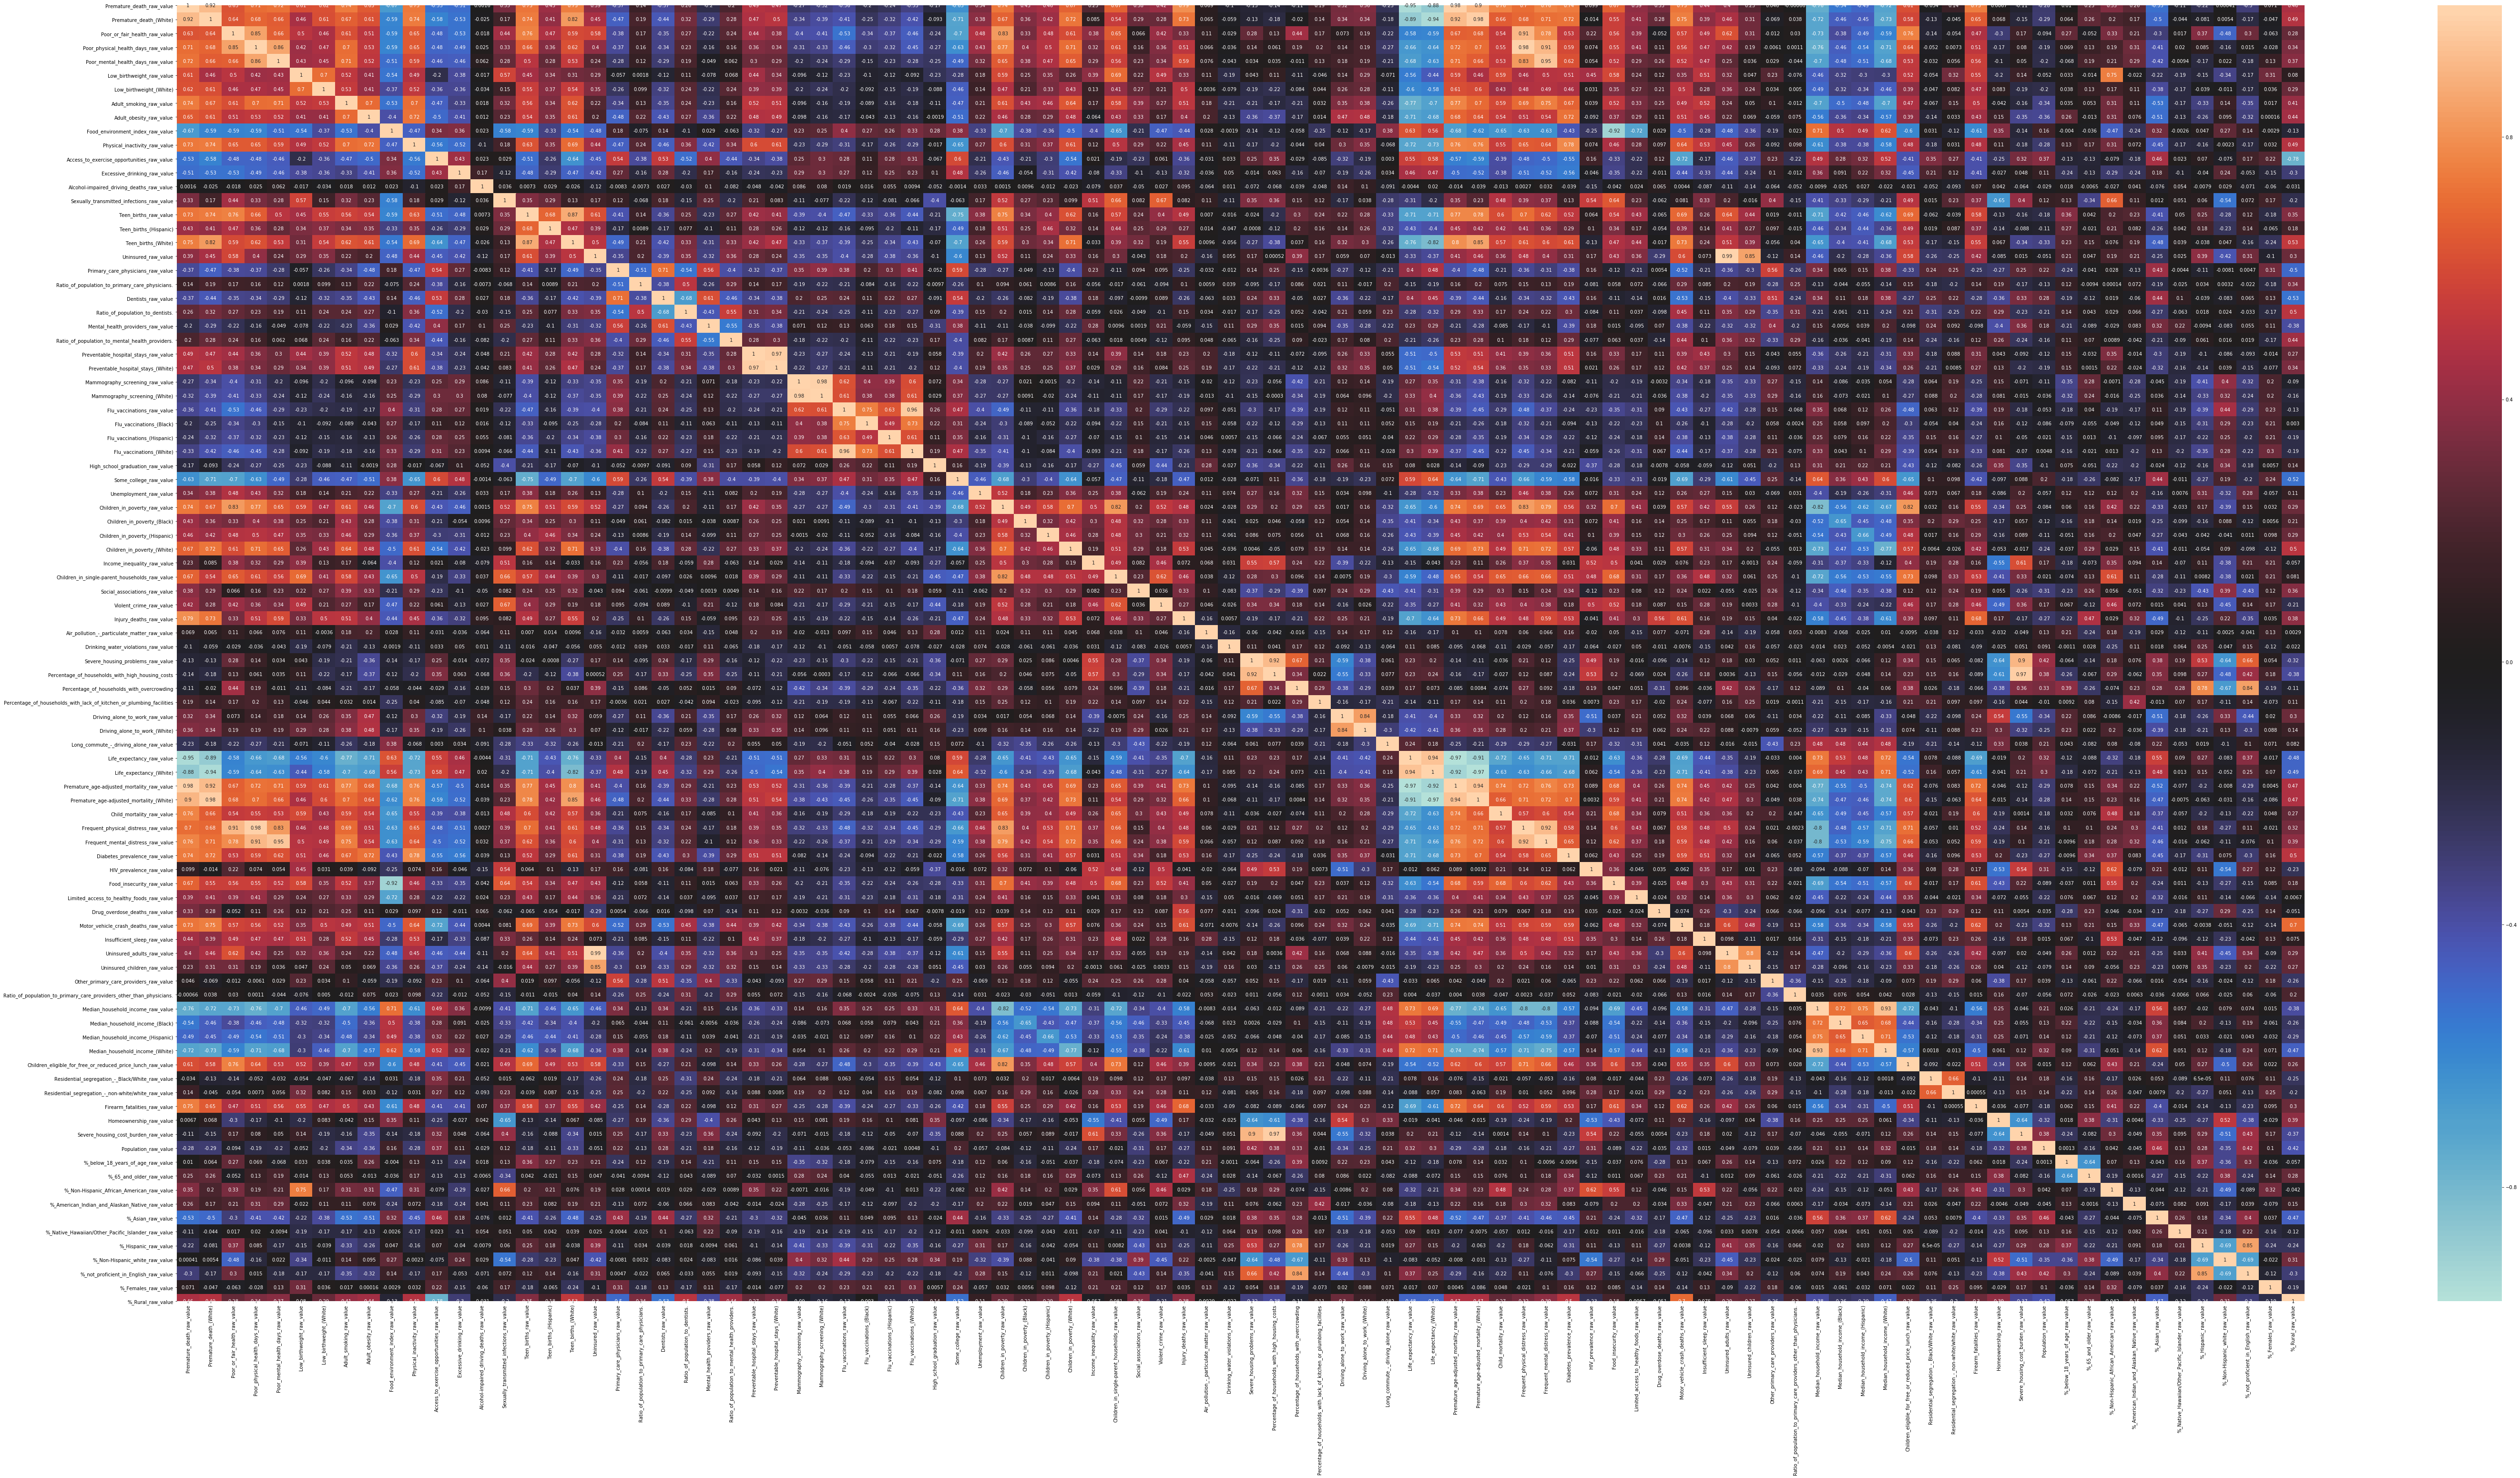

In [126]:
# creating a heatmap to see correlation between variables
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(100,50))
sns.heatmap(dfFinal.corr(), center=0, annot=True)

In [129]:
dfFinal.corr()


Premature_death_raw_value  \
Premature_death_raw_value                                      1   
Premature_death_(White)                                        1   
Poor_or_fair_health_raw_value                                  1   
Poor_physical_health_days_raw_value                            1   
Poor_mental_health_days_raw_value                              1   
...                                                          ...   
%_Hispanic_raw_value                                          -0   
%_Non-Hispanic_white_raw_value                                 0   
%_not_proficient_in_English_raw_value                         -0   
%_Females_raw_value                                            0   
%_Rural_raw_value                                              0   

                                       Premature_death_(White)  \
Premature_death_raw_value                                    1   
Premature_death_(White)                                      1   
Poor_or_fair_health_raw_value                                1   
Poor_physical_health_days_raw_value                          1   
Poor_mental_health_days_raw_value                            1   
...                                                        ...   
%_Hispanic_raw_value                                        -0   
%_Non-Hispanic_white_raw_value                               0   
%_not_proficient_in_English_raw_value                       -0   
%_Females_raw_value                                         -0   
%_Rural_raw_value                                            0   

                                       Poor_or_fair_health_raw_value  \
Premature_death_raw_value                                          1   
Premature_death_(White)                                            1   
Poor_or_fair_health_raw_value                                      1   
Poor_physical_health_days_raw_value                                1   
Poor_mental_health_days_raw_value                                  1   
...                                                              ...   
%_Hispanic_raw_value                                               0   
%_Non-Hispanic_white_raw_value                                    -0   
%_not_proficient_in_English_raw_value                              0   
%_Females_raw_value                                               -0   
%_Rural_raw_value                                                  0   

                                       Poor_physical_health_days_raw_value  \
Premature_death_raw_value                                                1   
Premature_death_(White)                                                  1   
Poor_or_fair_health_raw_value                                            1   
Poor_physical_health_days_raw_value                                      1   
Poor_mental_health_days_raw_value                                        1   
...                                                                    ...   
%_Hispanic_raw_value                                                     0   
%_Non-Hispanic_white_raw_value                                          -0   
%_not_proficient_in_English_raw_value                                    0   
%_Females_raw_value                                                     -0   
%_Rural_raw_value                                                        0   

                                       Poor_mental_health_days_raw_value  \
Premature_death_raw_value                                              1   
Premature_death_(White)                                                1   
Poor_or_fair_health_raw_value                                          1   
Poor_physical_health_days_raw_value                                    1   
Poor_mental_health_days_raw_value                                      1   
...                                                                  ...   
%_Hispanic_raw_value                                                  -0   
%_Non-Hispanic_whit

In [130]:
dfFinal.head()

Premature_death_raw_value  Premature_death_(White)  \
3                       8,824                    8,707   
4                       7,225                    7,278   
10                     12,218                   12,447   
13                     10,832                   11,110   
18                      7,933                    7,653   

    Poor_or_fair_health_raw_value  Poor_physical_health_days_raw_value  \
3                               0                                    4   
4                               0                                    4   
10                              0                                    4   
13                              0                                    5   
18                              0                                    5   

    Poor_mental_health_days_raw_value  Low_birthweight_raw_value  \
3                                   4                          0   
4                                   4                          0   
10                                  4                          0   
13                                  5                          0   
18                                  5                          0   

    Low_birthweight_(White)  Adult_smoking_raw_value  Adult_obesity_raw_value  \
3                         0                        0                        0   
4                         0                        0                        0   
10                        0                        0                        0   
13                        0                        0                        0   
18                        0                        0                        0   

    Food_environment_index_raw_value  ...  %_65_and_older_raw_value  \
3                                  7  ...                         0   
4                                  8  ...                         0   
10                                 7  ...                         0   
13                                 8  ...                         0   
18                                 8  ...                         0   

    %_Non-Hispanic_African_American_raw_value  \
3                                           0   
4                                           0   
10                                          0   
13                                          0   
18                                          0   

    %_American_Indian_and_Alaskan_Native_raw_value  %_Asian_raw_value  \
3                                                0                  0   
4                                                0                  0   
10                                               0                  0   
13                                               0                  0   
18                                               0                  0   

    %_Native_Hawaiian/Other_Pacific_Islander_raw_value  %_Hispanic_raw_value  \
3                                                   0                      0   
4                                                   0                      0   
10                                                  0                      0   
13                                                  0                      0   
18                                                  0                      0   

    %_Non-Hispanic_white_raw_value  %_not_proficient_in_English_raw_value  \
3                                1                                      0   
4                                1                                      0   
10                               1                                      0   
13                               1                                      0   
18                               1                                      0   

    %_Females_raw_value  %_Rural_raw_value  
3                     1                  0  
4                     1                  0  
10                    1                  0  
13                    1      

# <b>EXPLORATORY DATA ANALYSIS

# <B>Mental health:

In [64]:
dfMH=df[['State_Abbreviation','Name','Poor_mental_health_days_raw_value']]
dfMH.head()

State_Abbreviation            Name Poor_mental_health_days_raw_value
3                 AL  Autauga County                      4.3067392835
4                 AL  Baldwin County                      4.2496487805
5                 AL  Barbour County                       4.634994147
6                 AL     Bibb County                      4.3157100192
7                 AL   Blount County                      4.7015992588

In [65]:
for col in dfMH.columns:
    print(dfMH[col].dtypes, col)

object State_Abbreviation
object Name
object Poor_mental_health_days_raw_value


In [66]:
#changing the type of mental health days raw value from an object to a float
dfMH['Poor_mental_health_days_raw_value']=dfMH['Poor_mental_health_days_raw_value'].astype('float')

C:\Users\jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
dfMH.groupby(['State_Abbreviation'])['Poor_mental_health_days_raw_value'].mean()

State_Abbreviation
AK   4
AL   5
AR   5
AZ   4
CA   4
CO   4
CT   4
DC   4
DE   4
FL   4
GA   4
HI   3
IA   3
ID   4
IL   4
IN   4
KS   3
KY   5
LA   4
MA   4
MD   4
ME   4
MI   4
MN   3
MO   4
MS   4
MT   3
NC   4
ND   3
NE   3
NH   4
NJ   4
NM   4
NV   4
NY   4
OH   4
OK   5
OR   4
PA   4
RI   4
SC   5
SD   3
TN   5
TX   4
UT   4
VA   4
VT   4
WA   4
WI   4
WV   5
WY   3
Name: Poor_mental_health_days_raw_value, dtype: float64

Text(0.5, 0, 'State')

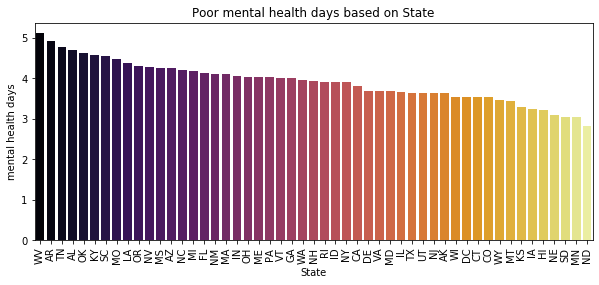

In [68]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfMH.groupby(['State_Abbreviation'])['Poor_mental_health_days_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Poor_mental_health_days_raw_value'], x = cnt.index, palette= 'inferno')
ax.set_title('Poor mental health days based on State')
ax.set_ylabel('mental health days')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')


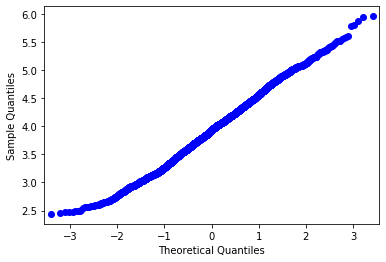

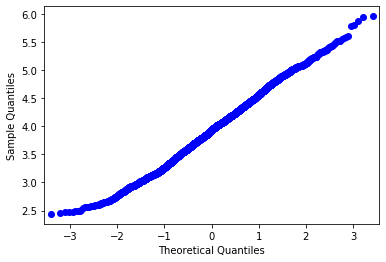

In [69]:
sm.qqplot(dfMH['Poor_mental_health_days_raw_value'])

In [70]:
sns.distplot(dfMH['% Unemployed'])

KeyError: '% Unemployed'

# <b>Physical health:

In [71]:
dfFH=df[['State_Abbreviation','Name','Poor_physical_health_days_raw_value']]
dfFH.head()

State_Abbreviation            Name Poor_physical_health_days_raw_value
3                 AL  Autauga County                        4.2005779826
4                 AL  Baldwin County                        4.0987477691
5                 AL  Barbour County                        5.0674383044
6                 AL     Bibb County                        4.3633772783
7                 AL   Blount County                        4.5127526482

In [72]:
#changing the type of physical health days raw value from an object to a float
dfFH['Poor_physical_health_days_raw_value']=dfFH['Poor_physical_health_days_raw_value'].astype('float')

C:\Users\jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'State')

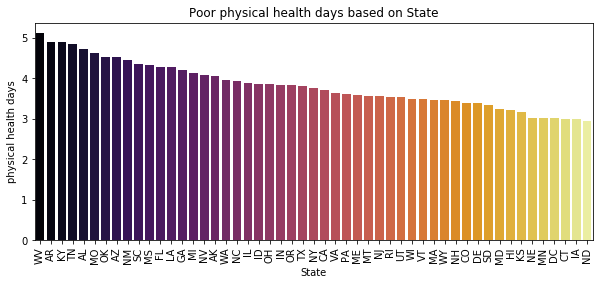

In [73]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfFH.groupby(['State_Abbreviation'])['Poor_physical_health_days_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Poor_physical_health_days_raw_value'], x = cnt.index, palette= 'inferno')
ax.set_title('Poor physical health days based on State')
ax.set_ylabel('physical health days')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')

# <b>Income:

In [74]:
df.head()

State_FIPS_Code County_FIPS_Code 5-digit_FIPS_Code State_Abbreviation  \
3              01              001             01001                 AL   
4              01              003             01003                 AL   
5              01              005             01005                 AL   
6              01              007             01007                 AL   
7              01              009             01009                 AL   

             Name Release_Year County_Ranked_(Yes=1/No=0)  \
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   
5  Barbour County         2019                          1   
6     Bibb County         2019                          1   
7   Blount County         2019                          1   

  Premature_death_raw_value Premature_death_(Black)  \
3              8824.0571232            10471.252986   
4              7224.6321603            10042.472874   
5               9586.165037            11332.562909   
6              11783.543675             14812.53928   
7              10908.101822                     NaN   

  Premature_death_(Hispanic)  ... Male_population_18-44_raw_value  \
3                        NaN  ...                             NaN   
4               3086.6056945  ...                             NaN   
5                        NaN  ...                             NaN   
6                        NaN  ...                             NaN   
7               5619.6451858  ...                             NaN   

  Male_population_45-64_raw_value Male_population_65+_raw_value  \
3                             NaN                           NaN   
4                             NaN                           NaN   
5                             NaN                           NaN   
6                             NaN                           NaN   
7                             NaN                           NaN   

  Total_male_population_raw_value Female_population_0-17_raw_value  \
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   
6                             NaN                              NaN   
7                             NaN                              NaN   

  Female_population_18-44_raw_value Female_population_45-64_raw_value  \
3                               NaN                               NaN   
4                               NaN                               NaN   
5                               NaN                               NaN   
6                               NaN                               NaN   
7                               NaN                               NaN   

  Female_population_65+_raw_value Total_female_population_raw_value  \
3                             NaN                               NaN   
4                             NaN                               NaN   
5                             NaN                               NaN   
6                             NaN                               NaN   
7                             NaN                               NaN   

  Population_growth_raw_value  
3                         NaN  
4                         NaN  
5                         NaN  
6                         NaN  
7                         NaN  

[5 rows x 158 columns]

In [75]:
dfI=df[['State_Abbreviation','Median_household_income_raw_value']]

In [76]:
dfI['Median_household_income_raw_value']=dfI['Median_household_income_raw_value'].astype('float')

C:\Users\jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'State')

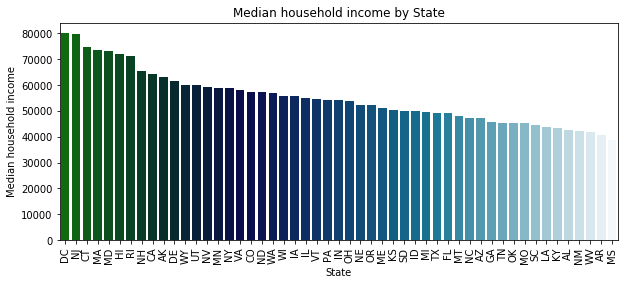

In [77]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfI.groupby(['State_Abbreviation'])['Median_household_income_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Median_household_income_raw_value'], x = cnt.index, palette= 'ocean')
ax.set_title('Median household income by State')
ax.set_ylabel('Median household income')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')

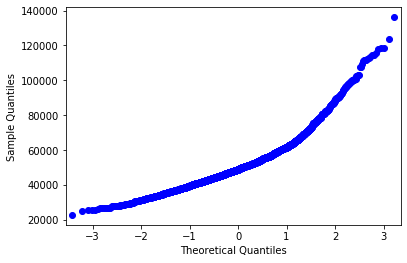

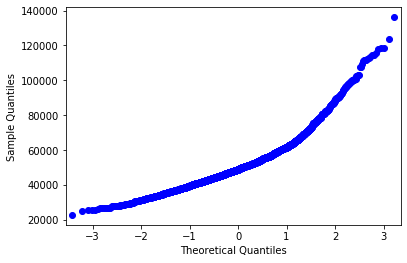

In [78]:
sm.qqplot(dfI['Median_household_income_raw_value'])

# <b>Employment status:

In [79]:
dfNew=df[['State_Abbreviation','Name','Unemployment_raw_value']]

In [80]:
dfNew.head()

State_Abbreviation            Name Unemployment_raw_value
3                 AL  Autauga County           0.0386352233
4                 AL  Baldwin County           0.0398833641
5                 AL  Barbour County           0.0590092278
6                 AL     Bibb County            0.043851399
7                 AL   Blount County           0.0402139299

In [81]:
dfNew['Unemployment_raw_value']=dfNew['Unemployment_raw_value'].astype(float)

C:\Users\jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'State')

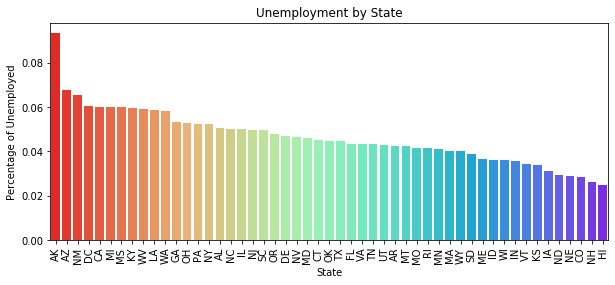

In [82]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = dfNew.groupby(['State_Abbreviation'])['Unemployment_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Unemployment_raw_value'], x = cnt.index, palette= 'rainbow_r')
ax.set_title('Unemployment by State')
ax.set_ylabel('Percentage of Unemployed')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')

In [83]:
sm.qqplot(combine['% Unemployed'])

NameError: name 'combine' is not defined

In [ ]:
sns.distplot(combine['% Unemployed'])

In [84]:
df.head()

State_FIPS_Code County_FIPS_Code 5-digit_FIPS_Code State_Abbreviation  \
3              01              001             01001                 AL   
4              01              003             01003                 AL   
5              01              005             01005                 AL   
6              01              007             01007                 AL   
7              01              009             01009                 AL   

             Name Release_Year County_Ranked_(Yes=1/No=0)  \
3  Autauga County         2019                          1   
4  Baldwin County         2019                          1   
5  Barbour County         2019                          1   
6     Bibb County         2019                          1   
7   Blount County         2019                          1   

  Premature_death_raw_value Premature_death_(Black)  \
3              8824.0571232            10471.252986   
4              7224.6321603            10042.472874   
5               9586.165037            11332.562909   
6              11783.543675             14812.53928   
7              10908.101822                     NaN   

  Premature_death_(Hispanic)  ... Male_population_18-44_raw_value  \
3                        NaN  ...                             NaN   
4               3086.6056945  ...                             NaN   
5                        NaN  ...                             NaN   
6                        NaN  ...                             NaN   
7               5619.6451858  ...                             NaN   

  Male_population_45-64_raw_value Male_population_65+_raw_value  \
3                             NaN                           NaN   
4                             NaN                           NaN   
5                             NaN                           NaN   
6                             NaN                           NaN   
7                             NaN                           NaN   

  Total_male_population_raw_value Female_population_0-17_raw_value  \
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   
6                             NaN                              NaN   
7                             NaN                              NaN   

  Female_population_18-44_raw_value Female_population_45-64_raw_value  \
3                               NaN                               NaN   
4                               NaN                               NaN   
5                               NaN                               NaN   
6                               NaN                               NaN   
7                               NaN                               NaN   

  Female_population_65+_raw_value Total_female_population_raw_value  \
3                             NaN                               NaN   
4                             NaN                               NaN   
5                             NaN                               NaN   
6                             NaN                               NaN   
7                             NaN                               NaN   

  Population_growth_raw_value  
3                         NaN  
4                         NaN  
5                         NaN  
6                         NaN  
7                         NaN  

[5 rows x 158 columns]

# Modeling

In [85]:
# setting the target variable and predictors
outcome = dfFinal['Poor_physical_health_days_raw_value']
features = dfFinal.drop(columns="Poor_physical_health_days_raw_value", axis=1)

# Baseline Model

In [86]:
#Splitting Datasets into Training and Testing, ensuring that testing size is at least 1000 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.45, random_state=42)

In [87]:
# standardising the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
feature_scaled = scaler.fit_transform(X_train)


# put them all in the DF
X_scaled = pd.DataFrame(feature_scaled, columns=X_train.columns)
all_train = pd.concat([X_scaled, y_train], axis=1)

In [88]:
# K-fold crossvalidation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

crossvalidation = KFold(n_splits=7, shuffle=True, random_state=42)
baseline = np.mean(cross_val_score(regression, X_scaled, y_train, scoring="r2", cv=crossvalidation))
baseline

0.9765631029172491

In [51]:

# check p-values whether the model can be imporved
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
                
x = sm.add_constant(features)
model = sm.OLS(outcome, x)
model = model.fit()
model.summary()

C:\Users\jesus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Poor_physical_health_days_raw_value   R-squared:                       0.985
Model:                                             OLS   Adj. R-squared:                  0.983
Method:                                  Least Squares   F-statistic:                     491.4
Date:                                 Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                                         06:27:23   Log-Likelihood:                 1006.4
No. Observations:                                  771   AIC:                            -1825.
Df Residuals:                                      677   BIC:                            -1388.
Df Model:                                           93                                         
Covariance Type:                             nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    2.9616      1.310      2.260      0.024       0.389       5.534
Premature_death_raw_value                                             4.465e-06   2.02e-05      0.221      0.825   -3.52e-05    4.41e-05
Premature_death_(White)                                              -1.855e-05   1.66e-05     -1.116      0.265   -5.12e-05    1.41e-05
Poor_or_fair_health_raw_value                                            0.4185      0.313      1.338      0.181      -0.196       1.033
Poor_mental_health_days_raw_value                                        0.2805      0.028     10.029      0.000       0.226       0.335
Low_birthweight_raw_value                                               -0.1503      0.804     -0.187      0.852      -1.729       1.428
Low_birthweight_(White)                                                 -0.1691      0.785     -0.215      0.830      -1.711       1.373
Adult_smoking_raw_value                                                 -0.5912      0.216     -2.739      0.006      -1.015      -0.167
Adult_obesity_raw_value                                                  0.0851      0.125      0.682      0.495      -0.160       0.330
Food_environment_index_raw_value                                        -0.0760      0.094     -0.810      0.418      -0.260       0.108
Physical_inactivity_raw_value                                           -0.0160      0.128     -0.126      0.900      -0.266       0.234
Access_to_exercise_opportunities_raw_value                              -0.0426      0.033     -1.299      0.194      -0.107       0.022
Excessive_drinking_raw_value                                             0.0755      0.169      0.446      0.656      -0.257       0.408
Alcohol-impaired_driving_deaths_raw_value                                0.0759      0.037      2.044      0.041       0.003       0.149
Sexually_transmitted_infections_raw_value                             2.496e-05   3.01e-05      0.830      0.407   -3.41e-05     8.4e-05
Teen_births_raw_value                                                    0.0042      0.001      3.536      0.000       0.002       0.007
Teen_births_(Hispanic)                                                  -0.0007      0.000     -2.299      0.022      -0.001   -9.54e-05
Teen_births_(White)                                                     -0.0016      0.001     -1.584      0.114      -0.004       0.000
Uninsured_raw_value

In [89]:
# based on p-value remove festures that are not relevant
outcome_p = dfFinal['Poor_physical_health_days_raw_value']
features_p = dfFinal.drop(["Premature_death_raw_value", "Premature_death_(White)",
                           "Poor_or_fair_health_raw_value", "Low_birthweight_raw_value",
                           "Low_birthweight_(White)", "Adult_obesity_raw_value",
                            "Food_environment_index_raw_value",
                            "Physical_inactivity_raw_value","Excessive_drinking_raw_value",
                            "Sexually_transmitted_infections_raw_value",
                          "Uninsured_raw_value","Primary_care_physicians_raw_value","Dentists_raw_value",
                           "Ratio_of_population_to_mental_health_providers.","Preventable_hospital_stays_raw_value",
                           "Flu_vaccinations_(Black)","Children_in_poverty_(Hispanic)","Children_in_poverty_(White)",
                           "Income_inequality_raw_value","Children_in_single-parent_households_raw_value",
                           "Social_associations_raw_value","Injury_deaths_raw_value",
                           "Air_pollution_-_particulate_matter_raw_value",
                          "Drinking_water_violations_raw_value" , "Severe_housing_problems_raw_value" , "Percentage_of_households_with_high_housing_costs", 
"Percentage_of_households_with_overcrowding", "Child_mortality_raw_value", 
"Drug_overdose_deaths_raw_value","Motor_vehicle_crash_deaths_raw_value"
, "Insufficient_sleep_raw_value"
, "Uninsured_adults_raw_value"
, "Median_household_income_raw_value"
, "Median_household_income_(Hispanic)"
, "Median_household_income_(White)"
, "Residential_segregation_-_non-white/white_raw_value"
, "Firearm_fatalities_raw_value"
, "Severe_housing_cost_burden_raw_value"
,"%_Non-Hispanic_white_raw_value"],axis= 1)

In [94]:
features_p.head()

Poor_physical_health_days_raw_value  Poor_mental_health_days_raw_value  \
3                                     4                                  4   
4                                     4                                  4   
10                                    4                                  4   
13                                    5                                  5   
18                                    5                                  5   

    Adult_smoking_raw_value  Access_to_exercise_opportunities_raw_value  \
3                         0                                           1   
4                         0                                           1   
10                        0                                           0   
13                        0                                           0   
18                        0                                           1   

    Alcohol-impaired_driving_deaths_raw_value  Teen_births_raw_value  \
3                                           0                     27   
4                                           0                     30   
10                                          0                     37   
13                                          0                     49   
18                                          0                     30   

    Teen_births_(Hispanic)  Teen_births_(White)  \
3                       27                   26   
4                       49                   28   
10                      37                   36   
13                      61                   51   
18                      72                   24   

    Ratio_of_population_to_primary_care_physicians.  \
3                                             2,409   
4                                             1,372   
10                                            1,549   
13                                            5,493   
18                                            1,830   

    Ratio_of_population_to_dentists.  ...  %_below_18_years_of_age_raw_value  \
3                              3,084  ...                                  0   
4                              2,006  ...                                  0   
10                             1,550  ...                                  0   
13                             3,672  ...                                  0   
18                             3,051  ...                                  0   

    %_65_and_older_raw_value  %_Non-Hispanic_African_American_raw_value  \
3                          0                                          0   
4                          0                                          0   
10                         0                                          0   
13                         0                                          0   
18                         0                                          0   

    %_American_Indian_and_Alaskan_Native_raw_value  %_Asian_raw_value  \
3                                                0                  0   
4                                                0                  0   
10                                               0                  0   
13                                               0                  0   
18                                               0                  0   

    %_Native_Hawaiian/Other_Pacific_Islander_raw_value  %_Hispanic_raw_value  \
3                                                   0                      0   
4                                                   0                      0   
10                                                  0                      0   
13                                                  0                      0   
18                                                  0                      0   

    %_not_proficient_in_English_raw_value  %_Females_raw_value  \
3                                       0                    1   
4                            

In [90]:
# run the model again
x = sm.add_constant(features_p)
model_p = sm.OLS(outcome_p,x)
model_p = model_p.fit()
model_p.summary()

C:\Users\jesus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Poor_physical_health_days_raw_value   R-squared:                       1.000
Model:                                             OLS   Adj. R-squared:                  1.000
Method:                                  Least Squares   F-statistic:                 2.538e+20
Date:                                 Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                                         09:07:43   Log-Likelihood:                 16500.
No. Observations:                                  771   AIC:                        -3.289e+04
Df Residuals:                                      715   BIC:                        -3.263e+04
Df Model:                                           55                                         
Covariance Type:                             nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                -3.791e-09   1.18e-09     -3.200      0.001   -6.12e-09   -1.47e-09
Poor_physical_health_days_raw_value                                      1.0000    6.9e-11   1.45e+10      0.000       1.000       1.000
Poor_mental_health_days_raw_value                                      1.27e-10   5.06e-11      2.508      0.012    2.76e-11    2.26e-10
Adult_smoking_raw_value                                              -1.064e-09   3.46e-10     -3.072      0.002   -1.74e-09   -3.84e-10
Access_to_exercise_opportunities_raw_value                           -8.751e-11   5.76e-11     -1.518      0.129   -2.01e-10    2.56e-11
Alcohol-impaired_driving_deaths_raw_value                            -1.211e-10   6.26e-11     -1.934      0.053   -2.44e-10    1.81e-12
Teen_births_raw_value                                                -7.849e-13   2.01e-12     -0.391      0.696   -4.73e-12    3.16e-12
Teen_births_(Hispanic)                                                1.118e-12   4.69e-13      2.386      0.017    1.98e-13    2.04e-12
Teen_births_(White)                                                   -2.39e-12   1.69e-12     -1.415      0.158   -5.71e-12    9.26e-13
Ratio_of_population_to_primary_care_physicians.                      -6.909e-15   2.83e-15     -2.440      0.015   -1.25e-14   -1.35e-15
Ratio_of_population_to_dentists.                                       -1.5e-15   4.74e-15     -0.317      0.752   -1.08e-14     7.8e-15
Mental_health_providers_raw_value                                    -7.468e-09   5.39e-09     -1.385      0.167   -1.81e-08    3.12e-09
Preventable_hospital_stays_(White)                                    5.494e-14   5.62e-15      9.776      0.000    4.39e-14     6.6e-14
Mammography_screening_raw_value                                      -5.442e-10   5.91e-10     -0.921      0.357    -1.7e-09    6.15e-10
Mammography_screening_(White)                                         1.774e-10   5.74e-10      0.309      0.757   -9.49e-10     1.3e-09
Flu_vaccinations_raw_value                                            1.554e-10   5.69e-10      0.273      0.785   -9.62e-10    1.27e-09
Flu_vaccinations_(Hispanic)                                          -2.321e-11   8.39e-11     -0.277      0.782   -1.88e-10    1.41e-10
Flu_vaccinations_(White)                                             -1.918e-10   5.54e-10     -0.346      0.729   -1.28e-09    8.96e-10
High_school_graduat

model is overfitting since there are stil lots of independent variables. so i will check for the Multicollinearity.

In [59]:
# variables with a vif of 5 or greater (or more definitively 10 or greater) are displaying multicollinearity with other variables in the feature set
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = features_p
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(features_p, vif))

[('Poor_physical_health_days_raw_value', 3324.550992581552),
 ('Poor_mental_health_days_raw_value', 1881.616732283415),
 ('Adult_smoking_raw_value', 166.27987305379682),
 ('Access_to_exercise_opportunities_raw_value', 96.57344978292318),
 ('Alcohol-impaired_driving_deaths_raw_value', 16.28277837086051),
 ('Teen_births_raw_value', 187.9817217275319),
 ('Teen_births_(Hispanic)', 19.627257493873028),
 ('Teen_births_(White)', 91.29990653543082),
 ('Ratio_of_population_to_primary_care_physicians.', 3.021119668088493),
 ('Ratio_of_population_to_dentists.', 6.854285079411949),
 ('Mental_health_providers_raw_value', 7.440224444043831),
 ('Preventable_hospital_stays_(White)', 32.1838918146969),
 ('Mammography_screening_raw_value', 2852.803343906271),
 ('Mammography_screening_(White)', 2785.229514345995),
 ('Flu_vaccinations_raw_value', 3239.3265652467767),
 ('Flu_vaccinations_(Hispanic)', 47.64660570053427),
 ('Flu_vaccinations_(White)', 3281.6593944136634),
 ('High_school_graduation_raw_value'

This process is not getting anywhere. We keep dropping columns that seem very relevant to our target variable. Let's take another approach by including interactions and polynomials.

# Interactions

In [92]:
# see if interactions or polynomials can improve the performance of the model
from itertools import combinations
combinations = list(combinations(X_scaled, 2))

interactions = []
data = X_scaled.copy()
for comb in combinations:
    data['interaction'] = data[comb[0]] * data[comb[1]]
    score = np.mean(cross_val_score(regression, data, y_train, scoring='r2', cv=crossvalidation))
    if score > baseline: interactions.append((comb[0], comb[1], round(score, 3)))
            
print('Top 7 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7])

Top 7 interactions: [('Poor_or_fair_health_raw_value', 'Frequent_physical_distress_raw_value', 0.979), ('Premature_death_(White)', 'Air_pollution_-_particulate_matter_raw_value', 0.978), ('Poor_or_fair_health_raw_value', 'Teen_births_raw_value', 0.978), ('Poor_or_fair_health_raw_value', 'Mammography_screening_raw_value', 0.978), ('Poor_or_fair_health_raw_value', 'Mammography_screening_(White)', 0.978), ('Poor_or_fair_health_raw_value', 'Flu_vaccinations_raw_value', 0.978), ('Poor_or_fair_health_raw_value', 'Flu_vaccinations_(White)', 0.978)]


In [93]:
# Write code to include the 7 most important interactions in your data set by adding 7 columns. Name the columns "var1_var2" with var1 and var2 the two variables in the interaction
df_inter = X_scaled.copy()
ls_interactions = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7]
for inter in ls_interactions:
    df_inter[inter[0] + '_' + inter[1]] = X_scaled[inter[0] ] * X_scaled[inter[1]]

# Polynomials

In [63]:
from sklearn.preprocessing import PolynomialFeatures
polynomials = []
for col in X_scaled.columns:
    for degree in [2, 3, 4]:
        data = X_scaled.copy()
        poly = PolynomialFeatures(degree, include_bias=False)
        X_transformed = poly.fit_transform(X_scaled[[col]])
        data = pd.concat([data.drop(col, axis=1),pd.DataFrame(X_transformed)], axis=1)
        score = np.mean(cross_val_score(regression, data, y_train, scoring='r2', cv=crossvalidation))
        if score > baseline: polynomials.append((col, degree, round(score, 3)))
print('Top 10 polynomials: %s' %sorted(polynomials, key=lambda poly: poly[2], reverse=True)[:10])

Top 10 polynomials: [('Poor_or_fair_health_raw_value', 2, 0.979), ('Poor_or_fair_health_raw_value', 3, 0.979), ('Poor_or_fair_health_raw_value', 4, 0.978), ('Frequent_physical_distress_raw_value', 2, 0.978), ('Frequent_physical_distress_raw_value', 3, 0.978), ('Frequent_physical_distress_raw_value', 4, 0.978), ('Premature_death_raw_value', 2, 0.977), ('Poor_mental_health_days_raw_value', 2, 0.977), ('Poor_mental_health_days_raw_value', 3, 0.977), ('Poor_mental_health_days_raw_value', 4, 0.977)]


In [ ]:
# For each variable, print out the maximum R2 possible when including Polynomials
polynom = pd.DataFrame(polynomials)
polynom.groupby([0], sort=False)[2].max()

In [ ]:
# Add Polynomials for the three features that seem to benefit the most
for col in ['Income inequality raw value', 'Premature death raw value', 'Children in poverty raw value']:
    poly = PolynomialFeatures(4, include_bias=False)
    X_transformed = poly.fit_transform(X_scaled[[col]])
    colnames= [col, col + '_' + '2',  col + '_' + '3', col + '_' + '4']
    df_inter = pd.concat([df_inter.drop(col, axis=1), pd.DataFrame(X_transformed, columns=colnames)], axis=1)

In [ ]:
# r2 of the model when interactions and polynomials are included
# crossvalidation = KFold(n_splits=7, shuffle=True, random_state=42)

full_model = np.mean(cross_val_score(regression, df_inter, y_train, scoring='r2', cv=crossvalidation))
full_model